In [1]:
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt 
from matplotlib import ticker as tck

This first bit of code will collect all the CSV data files from our working directory. The Washington Department of Ecology provides CTD data sets in one-month chunks only. We want to analyze one year, so we should see twelve CSV files populate below. The file names are based on the time/date of download.

In [2]:
csv_files=glob.glob('*.{}'.format('csv'))
csv_files

['MarineAmbientProfileResults_2023Mar07_3912.csv',
 'MarineAmbientProfileResults_2023Mar10_3694.csv',
 'MarineAmbientProfileResults_2023Mar10_3781.csv',
 'MarineAmbientProfileResults_2023Mar10_3793.csv',
 'MarineAmbientProfileResults_2023Mar10_3805.csv',
 'MarineAmbientProfileResults_2023Mar10_3867.csv',
 'MarineAmbientProfileResults_2023Mar10_3871.csv',
 'MarineAmbientProfileResults_2023Mar10_3883.csv',
 'MarineAmbientProfileResults_2023Mar10_3914.csv',
 'MarineAmbientProfileResults_2023Mar10_3923.csv',
 'MarineAmbientProfileResults_2023Mar10_3927.csv',
 'MarineAmbientProfileResults_2023Mar10_3951.csv']

Now we will import the CSV files listed above and combine them into a single data frame.

In [3]:
CTD=pd.concat(map(pd.read_csv,csv_files),ignore_index=True)
CTD

,Study_ID,Study_Name,Location_ID,Location_Description,Instrument_ID,Field_Collection_Type,Field_Collector,Time_Zone,Field_Collection_Date,Field_Collection_Time,...,Result_Value,Result_Value_Units,Result_Data_Qualifier,Result_Method,Result_Method_Description,Result_Comment,Result_Data_Review_Status,Calculated_Latitude_Decimal_Degrees_NAD83HARN,Calculated_Longitude_Decimal_Degrees_NAD83HARN,Continuous_Result_System_ID
0,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 3,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,01/15/2016,17:45:15.2066667,...,8.544600,deg C,NaN,TEMPTHERM,Temperature by thermistor,NaN,Final,48.41667,-123.025,118684678
1,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 4,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,01/15/2016,17:45:15.2066667,...,3.248383,S/m,NaN,CONDUCTIVITY-SBE,"Conductivity sensor using cylindrical, flow-th...",NaN,Final,48.41667,-123.025,118685025
2,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 29,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,01/15/2016,17:45:15.2066667,...,1.500000,m,NaN,UNESCO83-DepthCalc,Seawater depth calculated from pressure sensor...,NaN,Final,48.41667,-123.025,118686410
3,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 29,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,01/15/2016,17:45:15.2066667,...,1.513000,dbar,NaN,Pressure-StrainGauge,Strain-gauge pressure sensor,NaN,Final,48.41667,-123.025,118684331
4,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 29,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,01/15/2016,17:45:16.4100000,...,2.000000,m,NaN,UNESCO83-DepthCalc,Seawater depth calculated from pressure sensor...,NaN,Final,48.41667,-123.025,118686411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46316,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 3,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,12/05/2016,19:03:38.9633333,...,9.183700,deg C,NaN,TEMPTHERM,Temperature by thermistor,NaN,Final,48.41667,-123.025,122295052
46317,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 4,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,12/05/2016,19:03:38.9633333,...,3.383484,S/m,NaN,CONDUCTIVITY-SBE,"Conductivity sensor using cylindrical, flow-th...",NaN,Final,48.41667,-123.025,122295402
46318,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 4,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,12/05/2016,19:03:38.9633333,...,24.202500,kg/m3-1000,NaN,UNESCO83-DensityCalc,"Seawater density calculated from conductivity,...",NaN,Final,48.41667,-123.025,122295752
46319,MarineWater,Long-term marine water column monitoring 1999-...,SJF000,Strait of Juan de Fuca - South of Cattle Point...,SBE 43,Measurement,WA Dept of Ecology,UTC - Coordinated Universal Time,12/05/2016,19:03:38.9633333,...,6.842543,mg/L,IA,DO-CLARK,Dissolved Oxygen (DO) by Electrochemical Polar...,Calculated with Multiplier 1.070,Final,48.41667,-123.025,122312836


The depth measurements in the CSV files must be better sorted; some depth values are out of order. To sort them correctly, we must first sort by date so that each month has discrete depth measurements; we don’t want all measurements continuously. We can then perform a second-order sort by depth so that each month has a surface-to-bottom value.

In [4]:
#This converts our field collection dates from object to date time.
CTD['Field_Collection_Date']=pd.to_datetime(CTD['Field_Collection_Date'])

#Sorts by date then by depth
CTD.sort_values(['Field_Collection_Date','Depth_Value'],axis=0,ascending=True,inplace=True,na_position='first')

In [5]:
CTD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46321 entries, 2 to 46320
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Study_ID                                        46321 non-null  object        
 1   Study_Name                                      46321 non-null  object        
 2   Location_ID                                     46321 non-null  object        
 3   Location_Description                            46321 non-null  object        
 4   Instrument_ID                                   46321 non-null  object        
 5   Field_Collection_Type                           46321 non-null  object        
 6   Field_Collector                                 46321 non-null  object        
 7   Time_Zone                                       46321 non-null  object        
 8   Field_Collection_Date                         

The following lines will create three series assigning depth, date, and measurement values to the result parameters (variables) of the CTD casts.

In [6]:
#Values
data_series=pd.Series(data=CTD['Result_Value'].values,index=CTD['Result_Parameter_Name'])

#Dates
date_series=pd.Series(data=CTD['Field_Collection_Date'].values,index=CTD['Result_Parameter_Name'])

#Depths
depth_series=pd.Series(data=CTD['Depth_Value'].values,index=CTD['Result_Parameter_Name'])

Now we need to create a multi-index using the depth and date values. This index will act as the coordinate system for our data array later. The series we created before contain values for all of our parameters, but we only need the values from one. We will use temperature arbitrarily because all parameters should have equal measurements.

In [7]:
#Extracting the date and depth values. 
Depth=depth_series['Temperature, water'].values
Date=date_series['Temperature, water'].values

#Creating the index
idx=pd.MultiIndex.from_arrays(arrays=[Depth,Date],names=["Depth","Date"])
idx

MultiIndex([(  1.5, '2016-01-15'),
            (  2.0, '2016-01-15'),
            (  2.5, '2016-01-15'),
            (  3.0, '2016-01-15'),
            (  3.5, '2016-01-15'),
            (  4.0, '2016-01-15'),
            (  4.5, '2016-01-15'),
            (  5.0, '2016-01-15'),
            (  5.5, '2016-01-15'),
            (  6.0, '2016-01-15'),
            ...
            (171.0, '2016-12-05'),
            (171.5, '2016-12-05'),
            (172.0, '2016-12-05'),
            (172.5, '2016-12-05'),
            (173.0, '2016-12-05'),
            (173.5, '2016-12-05'),
            (174.0, '2016-12-05'),
            (174.5, '2016-12-05'),
            (175.0, '2016-12-05'),
            (175.5, '2016-12-05')],
           names=['Depth', 'Date'], length=4105)

We can apply that multi-index to the parameter values we are interested in and then convert those series into data arrays. Data arrays are the format we’ll need to create contour maps later.

In [8]:
#Temperature
t=pd.Series(data_series['Temperature, water'].values,index=idx)
tda=xr.DataArray.from_series(t)

#Salinity
s=pd.Series(data_series['Salinity'].values,index=idx)
sda=xr.DataArray.from_series(s)

#Density
p=pd.Series(data_series['Density as sigma-t'].values,index=idx)
pda=xr.DataArray.from_series(p)

#Dissolved Oxygen
o=pd.Series(data_series['Dissolved Oxygen'].values,index=idx)
oda=xr.DataArray.from_series(o)

#Fluorescence (Primary Productivity)
f=pd.Series(data_series['Fluorescence'].values,index=idx)
fda=xr.DataArray.from_series(f)

In [9]:
t

Depth  Date      
1.5    2016-01-15    8.5446
2.0    2016-01-15    8.5342
2.5    2016-01-15    8.5382
3.0    2016-01-15    8.5394
3.5    2016-01-15    8.5398
                      ...  
173.5  2016-12-05    9.1995
174.0  2016-12-05    9.2005
174.5  2016-12-05    9.1986
175.0  2016-12-05    9.1921
175.5  2016-12-05    9.1837
Length: 4105, dtype: float64

In [10]:
tda

<xarray.DataArray (Depth: 350, Date: 12)>
array([[    nan,     nan,     nan, ..., 10.664 ,     nan,  9.1975],
       [ 8.5446,     nan,     nan, ..., 10.6595, 10.3493,  9.1967],
       [ 8.5342,  8.5952,     nan, ..., 10.6449, 10.3491,  9.199 ],
       ...,
       [ 8.8711,     nan,  9.0039, ...,     nan,     nan,  9.1986],
       [    nan,     nan,     nan, ...,     nan,     nan,  9.1921],
       [    nan,     nan,     nan, ...,     nan,     nan,  9.1837]])
Coordinates:
  * Depth    (Depth) float64 1.0 1.5 2.0 2.5 3.0 ... 174.0 174.5 175.0 175.5
  * Date     (Date) datetime64[ns] 2016-01-15 2016-02-01 ... 2016-12-05

Here we calculate the summer and winter averages for each variblae in terms of depth (axis 1). To do this we extract data from the three summer months (Jun, Jul, and Aug) and the three winter months (Dec, Jan, and Feb) from each array. By doing this, we can create traditional CTD plots that will further isllustrate the seasonal contrast. Since this piece code is indexding via month, it will still work for plotting several years rather than just one.

In [11]:
meanTs=np.mean(tda.isel(Date=tda.Date.dt.month.isin([6,7,8])),axis=1)
meanTw=np.mean(tda.isel(Date=tda.Date.dt.month.isin([12,1,2])),axis=1)

meanSs=np.mean(sda.isel(Date=tda.Date.dt.month.isin([6,7,8])),axis=1)
meanSw=np.mean(sda.isel(Date=tda.Date.dt.month.isin([12,1,2])),axis=1)

meanPs=np.mean(pda.isel(Date=tda.Date.dt.month.isin([6,7,8])),axis=1)
meanPw=np.mean(pda.isel(Date=tda.Date.dt.month.isin([12,1,2])),axis=1)

meanOs=np.mean(oda.isel(Date=tda.Date.dt.month.isin([6,7,8])),axis=1)
meanOw=np.mean(oda.isel(Date=tda.Date.dt.month.isin([12,1,2])),axis=1)

meanFs=np.mean(fda.isel(Date=tda.Date.dt.month.isin([6,7,8])),axis=1)
meanFw=np.mean(fda.isel(Date=tda.Date.dt.month.isin([12,1,2])),axis=1)

In [12]:
meanTs

<xarray.DataArray (Depth: 350)>
array([10.6413    , 10.6152    , 10.8641    , 10.85326667, 10.83283333,
       10.81963333, 10.81266667, 10.807     , 10.8011    , 10.79533333,
       10.78136667, 10.7734    , 10.76926667, 10.7676    , 10.7668    ,
       10.7658    , 10.76413333, 10.75743333, 10.74856667, 10.73843333,
       10.7337    , 10.727     , 10.7217    , 10.7128    , 10.70853333,
       10.7189    , 10.71933333, 10.7108    , 10.6973    , 10.6875    ,
       10.68193333, 10.6725    , 10.6605    , 10.65243333, 10.64796667,
       10.63736667, 10.6237    , 10.61003333, 10.60853333, 10.60953333,
       10.615     , 10.61406667, 10.6136    , 10.60906667, 10.60753333,
       10.6056    , 10.60006667, 10.59773333, 10.59263333, 10.57993333,
       10.57436667, 10.57113333, 10.5671    , 10.55886667, 10.54966667,
       10.54283333, 10.54123333, 10.53803333, 10.53626667, 10.53656667,
       10.53926667, 10.5347    , 10.52543333, 10.5162    , 10.5073    ,
       10.50043333, 10.48766667, 10.4547    , 10.432     , 10.42223333,
       10.41803333, 10.41183333, 10.39776667, 10.39373333, 10.38616667,
       10.3749    , 10.36353333, 10.3605    , 10.36136667, 10.35193333,
       10.33963333, 10.3157    , 10.30003333, 10.2956    , 10.29176667,
       10.28873333, 10.28243333, 10.27536667, 10.27386667, 10.274     ,
       10.2678    , 10.26243333, 10.2526    , 10.24446667, 10.23986667,
       10.2352    , 10.2291    , 10.2237    , 10.21476667, 10.2077    ,
...
        8.57403333,  8.55073333,  8.52313333,  8.50636667,  8.4944    ,
        8.4927    ,  8.49216667,  8.4908    ,  8.4912    ,  8.49176667,
        8.4891    ,  8.47296667,  8.46473333,  8.46983333,  8.4649    ,
        8.4646    ,  8.46306667,  8.46086667,  8.4568    ,  8.44703333,
        8.43396667,  8.43016667,  8.4244    ,  8.4137    ,  8.4058    ,
        8.393     ,  8.37133333,  8.36583333,  8.36106667,  8.3577    ,
        8.35506667,  8.3533    ,  8.35056667,  8.34756667,  8.3449    ,
        8.34306667,  8.34033333,  8.33493333,  8.32733333,  8.32053333,
        8.3185    ,  8.3187    ,  8.31153333,  8.30043333,  8.28706667,
        8.26936667,  8.2375    ,  8.2218    ,  8.21983333,  8.21646667,
        8.21226667,  8.20833333,  8.1978    ,  8.1907    ,  8.1833    ,
        8.17766667,  8.17116667,  8.16546667,  8.15973333,  8.15536667,
        8.15413333,  8.1518    ,  8.1493    ,  8.14716667,  8.14466667,
        8.14116667,  8.13706667,  8.1298    ,  8.12573333,  8.1227    ,
        8.12016667,  8.11676667,  8.11383333,  8.1088    ,  8.09596667,
        8.08446667,  8.0758    ,  8.07226667,  8.06833333,  8.25445   ,
        8.2536    ,  8.25295   ,  8.2491    ,  8.2301    ,  8.1887    ,
        8.1707    ,  8.1672    ,  8.1656    ,  8.1638    ,  8.162     ,
        8.1604    ,  8.1595    ,  8.15895   ,  8.1585    ,  8.1571    ,
        8.1562    ,  8.15585   ,  8.15635   ,  8.1535    ,         nan])
Coordinates:
  * Depth    (Depth) float64 1.0 1.5 2.0 2.5 3.0 ... 174.0 174.5 175.0 175.5

This will assign the date and depth values from our data arrays to our axes when the figures are ploted. The negative sign (-) will invert the y-axis so that the surface value (0) is at the top and depth increaeses towards the x-axis. This makes a depth profile that is more intuitive to read. Since an equale number of measurments are taken for each variable, we need only choose one for the coordinates. In this case we a using the temperature data array. 

In [13]:
x=tda.Date.values
y=-(tda.Depth.values)

Now we will remove the negative sign from our y-axis labels which is a consequence of inverting the axis. This is only visual and will not change the data.

In [14]:
tck.FuncFormatter
def major_formatter(x, pos):
    label = str(-x) if x < 0 else str(x)
    return label

All that is left now is to format the data into countor plots. The plot subtitle is pulled is pulled directly from the CSV files. So, if data from another sites is used, it should change automaticaly.   

Text(0.05, -0.18, 'Low')

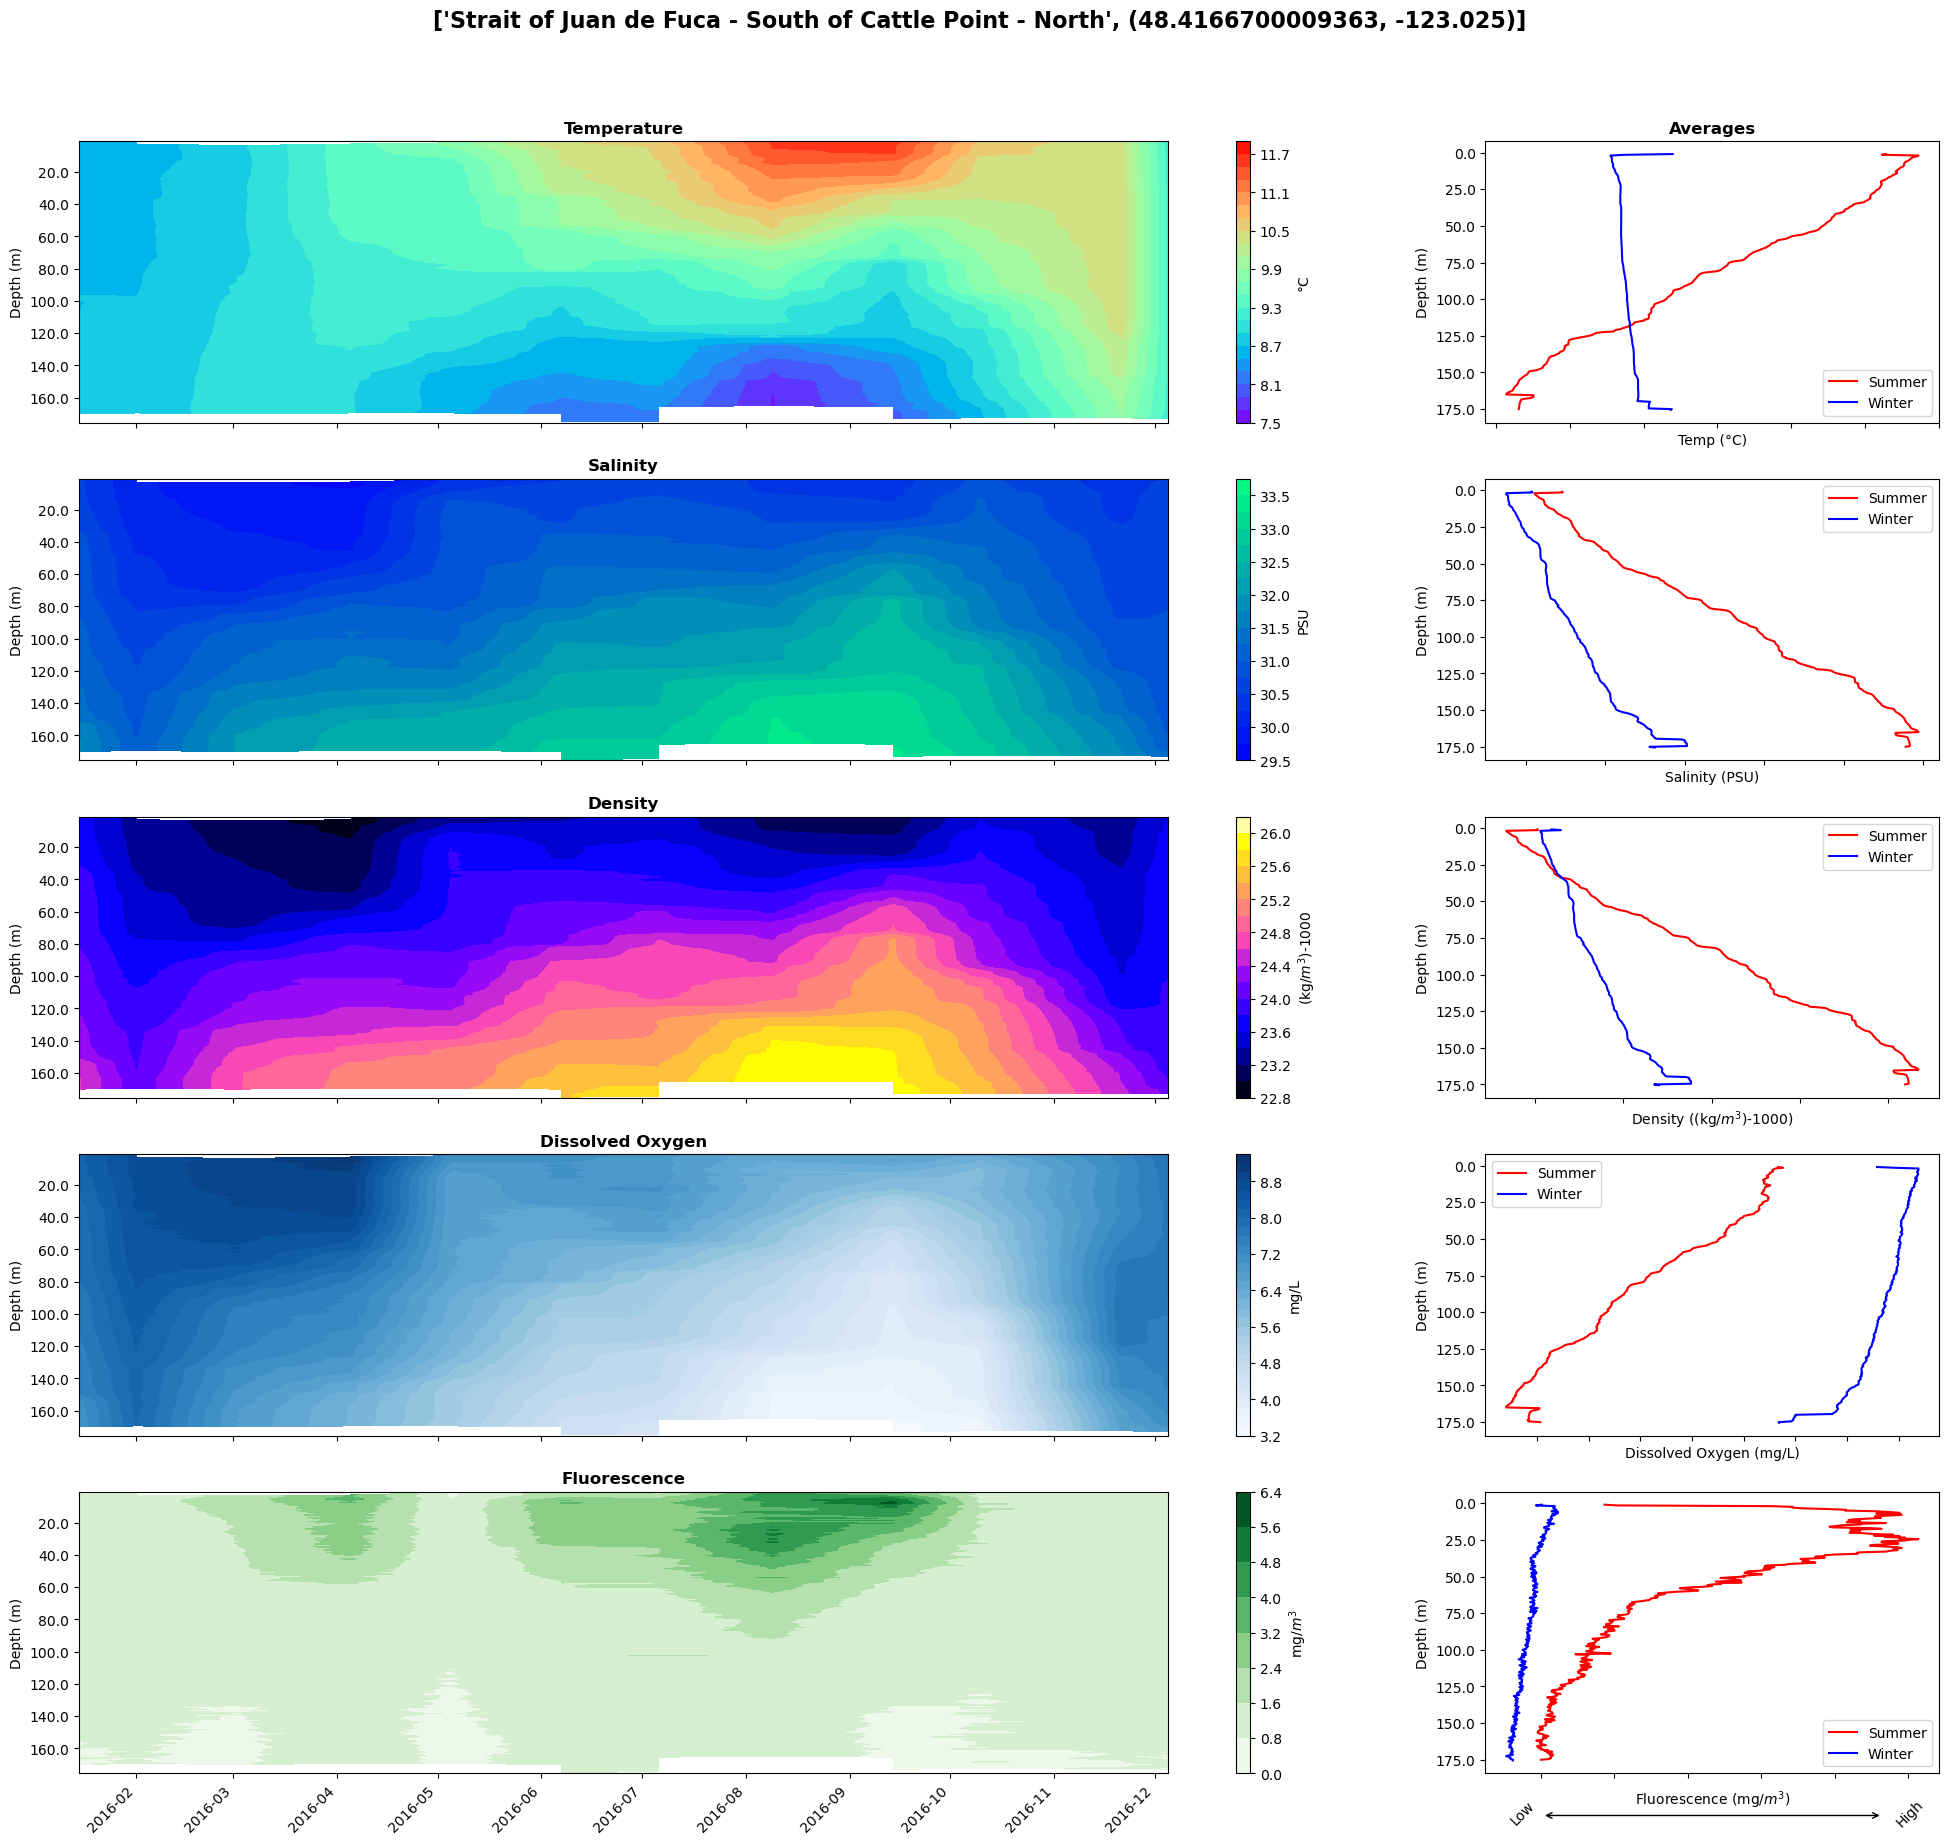

In [15]:
fig,ax=plt.subplots(ncols=2,nrows=5,gridspec_kw={'width_ratios':[15,5]},figsize=(24,24))
fig.suptitle([CTD.iloc[0,3],(CTD.iloc[0,24],CTD.iloc[0,25])],fontsize=16.0,y=0.935,fontweight='bold')
fig.autofmt_xdate(rotation=45)
plt.subplots_adjust(wspace=0.05)

#Temperature Contour
temp=ax[0,0].contourf(x,y,tda,levels=np.arange(7.5,12,.2),cmap='rainbow')
ax[0,0].yaxis.set_major_formatter(major_formatter)
ax[0,0].set_ylabel('Depth (m)')
ax[0,0].set_title('Temperature',fontweight='bold')
templ=fig.colorbar(temp,ax=ax[0,0])
templ.set_label(chr(176)+'C')

#Temperature Seasonal Average
ax[0,1].plot(meanTs,y,color='red')
ax[0,1].plot(meanTw,y,color='blue')
ax[0,1].set_ylabel('Depth (m)')
ax[0,1].yaxis.set_major_formatter(major_formatter)
ax[0,1].set_title('Averages',fontweight='bold')
ax[0,1].set_xlabel('Temp ('+chr(176)+'C'+')')
ax[0,1].legend(['Summer','Winter'],loc='lower right')

#Salinity Contour
salt=ax[1,0].contourf(x,y,sda,levels=np.arange(29.5,34,.25),cmap='winter')
ax[1,0].yaxis.set_major_formatter(major_formatter)
ax[1,0].set_ylabel('Depth (m)')
ax[1,0].set_title('Salinity',fontweight='bold')
saltl=fig.colorbar(salt,ax=ax[1,0])
saltl.set_label('PSU')

#Salinity Seasonal Average
ax[1,1].plot(meanSs,y,color='red')
ax[1,1].plot(meanSw,y,color='blue')
ax[1,1].set_ylabel('Depth (m)')
ax[1,1].yaxis.set_major_formatter(major_formatter)
ax[1,1].set_xlabel('Salinity (PSU)')
ax[1,1].legend(['Summer','Winter'],loc='upper right')

#Density Contour
dens=ax[2,0].contourf(x,y,pda,levels=np.arange(22.8,26.4,.2),cmap='gnuplot2')
ax[2,0].yaxis.set_major_formatter(major_formatter)
ax[2,0].set_ylabel('Depth (m)')
ax[2,0].set_title('Density',fontweight='bold')
densl=fig.colorbar(dens,ax=ax[2,0])
densl.set_label('(kg/$m^3$)-1000')

#Density Seasonal Average
ax[2,1].plot(meanPs,y,color='red')
ax[2,1].plot(meanPw,y,color='blue')
ax[2,1].set_ylabel('Depth (m)')
ax[2,1].yaxis.set_major_formatter(major_formatter)
ax[2,1].set_xlabel('Density ((kg/$m^3$)-1000)')
ax[2,1].legend(['Summer','Winter'],loc='upper right')

#Dissolved Oxygen Contour
oxy=ax[3,0].contourf(x,y,oda,levels=np.arange(3.2,9.6,.2),cmap='Blues')
ax[3,0].yaxis.set_major_formatter(major_formatter)
ax[3,0].set_ylabel('Depth (m)')
ax[3,0].set_title('Dissolved Oxygen',fontweight='bold')
oxyl=fig.colorbar(oxy,ax=ax[3,0])
oxyl.set_label('mg/L')

#Dissolved Oxygen Seasonal Average
ax[3,1].plot(meanOs,y,color='red')
ax[3,1].plot(meanOw,y,color='blue')
ax[3,1].set_ylabel('Depth (m)')
ax[3,1].yaxis.set_major_formatter(major_formatter)
ax[3,1].set_xlabel('Dissolved Oxygen (mg/L)')
ax[3,1].legend(['Summer','Winter'],loc='upper left')

#Fluorescence Contour
flr=ax[4,0].contourf(x,y,fda,levels=np.arange(0,6.5,.8),cmap='Greens')
ax[4,0].yaxis.set_major_formatter(major_formatter)
ax[4,0].set_ylabel('Depth (m)')
ax[4,0].set_title('Fluorescence',fontweight='bold')
flrl=fig.colorbar(flr,ax=ax[4,0])
flrl.set_label('mg/$m^3$')

#Fluorescence Seasonal Average
ax[4,1].plot(meanFs,y,color='red')
ax[4,1].plot(meanFw,y,color='blue')
ax[4,1].set_ylabel('Depth (m)')
ax[4,1].yaxis.set_major_formatter(major_formatter)
ax[4,1].set_xlabel('Fluorescence (mg/$m^3$)')
ax[4,1].legend(['Summer','Winter'],loc='lower right')
ax[4,1].set_xticklabels('')

#Formating a generalized y-axis label for the seasonal averages. 
ax[4,1].annotate('', xy=(0.125, -0.15), xycoords='axes fraction',xytext=(0.875, -0.15),arrowprops=dict(arrowstyle="<->"))
ax[4,1].annotate('High',xy=(0.25, -0.15),xycoords='axes fraction',xytext=(0.9, -0.19),rotation=45)
ax[4,1].annotate('Low',xy=(0.01, -0.15),xycoords='axes fraction',xytext=(0.05, -0.18),rotation=45)